<a href="https://colab.research.google.com/github/Awiity/pracproj/blob/main/pracproj_webscraper_remotedotco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping https://remote.co/remote-jobs/developer/

In [38]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

URL: str = "https://remote.co/remote-jobs/developer/"
page: requests.models.Response = requests.get(URL) # type(page) requests.models.Response

soup = BeautifulSoup(page.content, "html.parser")

job_elements = soup.find("main").find("div", class_="row row-with-sidebar").find("div", class_="card bg-white m-0").find_all("a", class_="card m-0 border-left-0 border-right-0 border-top-0 border-bottom")
print(job_elements[0])




<a class="card m-0 border-left-0 border-right-0 border-top-0 border-bottom" href="/job/staff-software-engineer-full-stack-24/">
<div class="card border-0 p-3 job-card bg-white">
<div class="row no-gutters align-items-center">
<div class="col-lg-1 col-md-2 position-static d-none d-md-block pr-md-3">
<img alt="brightwheel" class="card-img" data-lazy-src="https://remoteco.s3.amazonaws.com/wp-content/uploads/2020/09/07134510/brightwheel-150x150.jpg" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E"/><noscript><img alt="brightwheel" class="card-img" src="https://remoteco.s3.amazonaws.com/wp-content/uploads/2020/09/07134510/brightwheel-150x150.jpg"/></noscript>
</div>
<div class="col position-static">
<div class="card-body px-3 py-0 pl-md-0">
<p class="m-0"><span class="font-weight-bold larger">Staff Software Engineer, Full Stack</span><span class="float-right d-none d-md-inline text-secondary"><small><date>1 day ago</date></small></s

# Main stuff


In [55]:
job_titles: list = []
job_companies: list = []
job_types: list = []
for job in job_elements:
  job_titles.append(job.find("p", class_="m-0").find("span").text.strip())

  company_info = job.find("p", class_="m-0 text-secondary")
  job_types.append(company_info.find("small").text)
  job_companies.append(company_info.text.split("\n")[1].strip())

dictpd = {
    "Title": job_titles,
    "Job type": job_types,
    "Company name": job_companies,
}
df = pd.DataFrame(dictpd)
df

,Title,Job type,Company name
0,"Staff Software Engineer, Full Stack",Full-time,brightwheel
1,Senior Ruby on Rails Backend Engineer,Full-time,Qonto
2,Javascript Engineer : Prospect Solutions,Full-time,Constructor.io
3,Fully Remote: Blockchain Engineer,Full-time,VALR
4,Senior Full Stack Engineer,Full-time,IT Labs
5,Senior Back End Engineer,Full-time,MotiveMetrics
6,Senior Frontend developer,Full-time,Social Discovery Group
7,"Lead Software Engineer, Frontend",Full-time,Torch Leadership Labs
8,Sr. Fullstack Engineer,Full-time,Nimble Rx
9,Senior Software Engineer,Full-time,Chainlink Labs


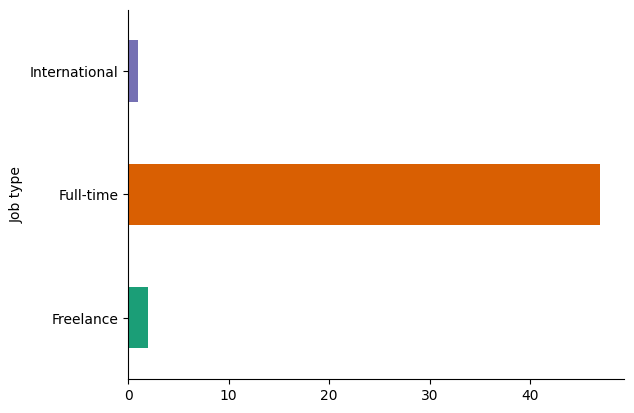

In [56]:
# @title Job type
# automated plot by Pandas ****
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Job type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)